In [1]:
import warnings
import collections
import os
import pandas as pd # manage data
import pickle as pk # load and save python objects
import numpy as np # matrix operations
import matplotlib.pyplot as plt
import unidecode # Deal with codifications
import regex # use regular expresions
from email.header import Header, decode_header # e-mails helper functions
from nltk.tokenize import word_tokenize # Natural Language Toolkit
from selectolax.parser import HTMLParser # Optimized html library
from tqdm import tqdm # For loops decorator

In [2]:
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
# Helper functions
def get_text_from _html(html):
    '''
    Extracted from https://rushter.com/blog/python-fast-html-parser/ to eliminate html tags from email body
    
    Parameters
    html: html file
    Return
    text: html text content
    '''
    tree = HTMLParser(html)

    if tree.body is None:
        return html

    for tag in tree.css('script'):
        tag.decompose()
    for tag in tree.css('style'):
        tag.decompose()

    text = unidecode.unidecode(tree.body.text(separator=' '))
    
    return text

def clean_mail_subject(mail_header):
    '''
    Clean mail subject
    Parameters
    mail_header: email.Header object or string or None.
    Return
    decoded_header: string containing mail subject
    '''
    
    if type(mail_header) == Header:
        decoded_header = decode_header(mail_header.encode())[0][0].decode('utf-8')
    else:
        decoded_header = mail_header
        
    if decoded_header[:5] == 'Fwd: ':
        decoded_header = decoded_header[5:]
    elif decoded_header[:4] == 'Re: ':
        decoded_header = decoded_header[4:]
        
    decoded_header = re.sub(r"[^a-zA-Z?.!,¿]+", " ", decoded_header)
        
    return decoded_header

def clean_mail_body(str_):
    '''Clean mail body'''
    str_ = str_.replace('\t', '')
    new_str = regex.split(r'(\bEl \d{1,2} de [a-z]+ de 2\d{3},)', str_)[0]
    new_str = regex.split(r'(\bOn \d{1,2} de [a-z]+. de 2\d{3},)', new_str)[0]
    
    if len(new_str) > 0:
        return new_str
    else:
        return str_
    
def filter_firm(str_):
    '''Clean mail firm'''
    new_str = regex.split(r'(Adela C. Santillana Figueroa)|(Claudia Alarcon Burga)|(Miguel Koch Zavaleta)|(Rocio Villavicencio Ripas)|(Maria Alejandra Alba S.)|(Fiorella.)|(Fiorella Romero Cardenas)|(Directora de Servicios Academicos y Registro)|(Asistente Administrativ[a|o])|(Servicios Academicos y Registro)|(FORMAMOS LIDERES RESPONSABLES PARA EL MUNDO)|(up.edu.pe)|(Jr. Sanchez Cerro 2141 Jesus Maria, Lima 11)|(T.  511-219-0100 Ext. [0-9]{4})|([a-zA-z0-9-.]+@up.edu.pe)|(Pensemos en el AMBIENTE antes de imprimir este mensaje)', str_)[0]
    
    if len(new_str) > 0:
        return new_str
    else:
        return str_

In [5]:
# # Define output dir
# outDir = 'output/'
# actualDir = 'data_cleaning_nlp'

# print()
# if not(actualDir in os.listdir(outDir)):
#     os.mkdir(os.path.join(outDir, actualDir))
#     print('output dir created')
# else:
#     print('output dir already created')
# print()

In [6]:
ROOT = "~/Documents/TF_chatbot"

In [25]:
input_file = "../../../text_data/mails.txt"

with open(input_file, "r") as input_f:
    for lines in input_f:
        s = lines.readline()
#     for mail in mails:
#         for item in mail:
#             output.write(str(item) + '\t')
#         output.write('\n')

In [26]:
s

''

In [15]:
# Load complete email data
mails = pk.load(open("../../../text_data/mails.txt", 'rb'))
df = pd.DataFrame(mails, columns=['id','subject','date','sender','recipient','body'])

EOFError: Ran out of input

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107484 entries, 0 to 107483
Data columns (total 6 columns):
id           107484 non-null object
subject      107384 non-null object
date         107484 non-null object
sender       107484 non-null object
recipient    107339 non-null object
body         107484 non-null object
dtypes: object(6)
memory usage: 4.9+ MB


In [128]:
print()
print(df.isna().sum())
print()


id             0
subject      100
date           0
sender         0
recipient    145
body           0
dtype: int64



In [129]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True) # transform dates to datetime format

In [130]:
df['date'].describe()

count                  107484
unique                 104474
top       2018-02-28 21:04:25
freq                      137
first     2015-05-06 19:18:58
last      2018-08-23 22:57:16
Name: date, dtype: object

#### Periodo de los datos: 6 ciclos y medio (+ 3 ciclos-0)

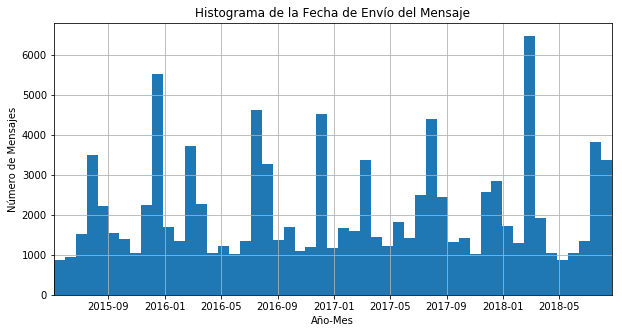

In [131]:
df['date'].hist(bins=51, figsize=(10,5))
plt.xlim(df['date'].min(), df['date'].max())
plt.title('Histograma de la Fecha de Envío del Mensaje')
plt.ylabel('Número de Mensajes')
plt.xlabel('Año-Mes')
plt.show()
#plt.savefig('hist_fecha.svg', format='svg')

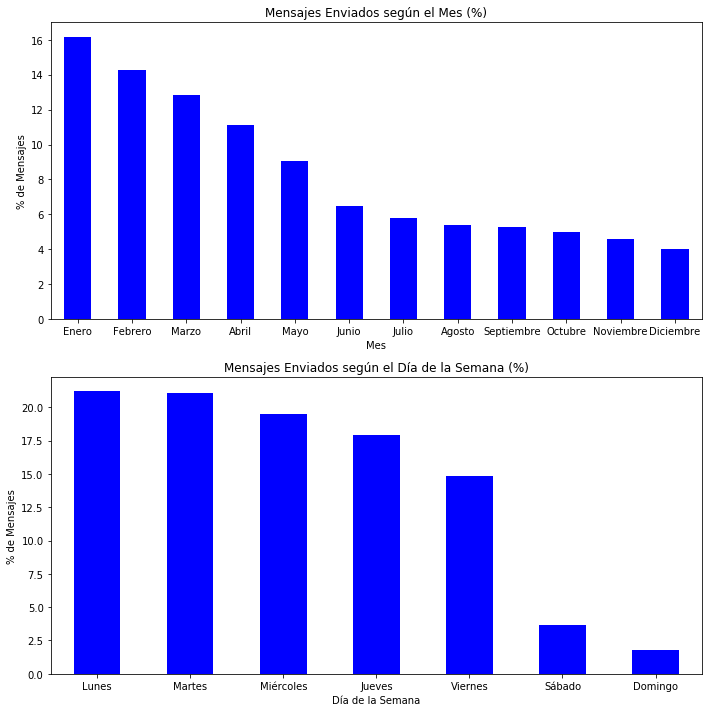

In [132]:
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek

# Plot for month and day of week variables
day_value_counts = (df['dayofweek'].value_counts()/df.shape[0])*100
month_value_counts = (df['month'].value_counts()/df.shape[0])*100

monthnames_ES = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
daynames_ES = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

month_value_counts.plot(ax=ax1, rot=0, kind='bar', title='Mensajes Enviados según el Mes (%)', color='b')
ax1.set_xticklabels(monthnames_ES)
ax1.set_ylabel('% de Mensajes')
ax1.set_xlabel('Mes')

day_value_counts.plot(ax=ax2, rot=0, kind='bar', title='Mensajes Enviados según el Día de la Semana (%)', color='b')
ax2.set_xticklabels(daynames_ES)
ax2.set_ylabel('% de Mensajes')
ax2.set_xlabel('Día de la Semana')

plt.tight_layout()
plt.show()
#fig.savefig('grafico_barras_dia_mes.svg', format='svg')
#fig.savefig('grafico_barras_dia_mes.png', format='png')

In [133]:
%%time
df['body'] = df['body'].apply(get_text_selectolax) # filter text from hltm emails

CPU times: user 45 s, sys: 2.35 s, total: 47.3 s
Wall time: 47.3 s


In [134]:
# Extract sender and recipient email only
df['sender_email'] = df.sender.str.extract("([a-zA-z0-9-.]+@[a-zA-z0-9-.]+)")[0].str.lower()
df['recipient_email'] = df.recipient.str.extract("([a-zA-z0-9-.]+@[a-zA-z0-9-.]+)")[0].str.lower()

In [135]:
print()
print(df.isna().sum())
print()


id                   0
subject            100
date                 0
sender               0
recipient          145
body                 0
month                0
dayofweek            0
sender_email         1
recipient_email    422
dtype: int64



In [136]:
# eliminate 'no reply' and 'automatic' msgs
df_noreply = df[~df.sender.str.contains('noreply@google.com').fillna(False)]
df_noautom = df_noreply[~df_noreply.subject.str.contains('Respuesta automática').fillna(False)]

# Separate msgs by type of sender
send_by_alumns = df_noautom[df_noautom.sender.str.contains('@alum.up.edu.pe').fillna(False)]
send_by_no_alumns = df_noautom[~df_noautom.sender.str.contains('@alum.up.edu.pe').fillna(False)]
send_by_internals = df_noautom[df_noautom.sender.str.contains('@up.edu.pe').fillna(False)]

print('# msgs send by alumns:', len(send_by_alumns))
print('# of alumns that send msgs:', len(send_by_alumns.sender_email.unique()))

# msgs send by alumns: 14021
# of alumns that send msgs: 3781


In [137]:
len(send_by_internals)

47246

In [138]:
# Clean mails subject
send_by_internals['subject'] = send_by_internals['subject'].apply(filterResponses)

## Email pairing algorithm

1. Extrae los mensajes enviados por alumno y los mensajes enviados por usuarios internos a cada alumno, respectivamente
2. Extrae el asunto de cada mensaje del punto 1. Si el asunto del mensaje es igual al asunto enviado en el mensaje anterior aumenta el contador de mensajes con el mismo asunto.
3. Utilizando en contador de mensajes con el mismo asunto, busca el asunto extraido en el punto 2 entre los emails enviados por usuarios internos a ese alumno.
4. Genera una lista con el asunto, los datos del mail enviado por el alumno y la respuesta que recibió.

In [139]:
# Separate mails sended to each alumn
dfs = [send_by_internals[send_by_internals.recipient_email == alumn] for alumn in send_by_alumns.sender_email.unique()]

In [140]:
unique_alumns = send_by_alumns.sender_email.unique()
n = len(unique_alumns)

# Count causes to not being able to process a text
resp_date_bigger_than_input_date = 0
responses_with_same_subject_lower_than_counter = 0
subject_equal_none = 0
n_obs_less_than_0 = 0
repited_id = 0

for i, alumn in tqdm(enumerate(unique_alumns), total=n):
    if len(dfs[i]) > 0:
        temp_ = send_by_alumns[send_by_alumns.sender_email == alumn]
        indexes = temp_.index
        counter_subject = 0
        subject_pre = 'initial_value'
        
        for index in indexes:
            subject = filterResponses(temp_.subject[index])
            if subject != None:
                if subject_pre == subject:
                    counter_subject += 1
                else:
                    counter_subject = 0
                subject_pre = subject
            
                if len(dfs[i][dfs[i]['subject'] == subject]) > counter_subject:                    
                    input_date = temp_.loc[index, 'date']
                    resp_date = dfs[i]['date'][dfs[i]['subject'] == subject].iloc[counter_subject]
                    if input_date < resp_date:
                        input_id, sender, recipient, input_body = temp_.loc[index, ['id','sender','recipient','body']]
                        resp_id, resp_body = dfs[i][['id','body']][dfs[i]['subject'] == subject].iloc[counter_subject]
                        pair = np.array([[subject, sender, recipient, input_id, input_date, input_body, resp_id, resp_date, resp_body]],dtype=object)
                        if i == 0:
                            pairs = np.array(pair)
                        elif all([not(pair[0,3] in pairs[:,3]), not(pair[0,6] in pairs[:,6])]):
                            pairs = np.append(pairs, pair, axis=0)
                        else:
                            repited_id += 1
                    else:
                        resp_date_bigger_than_input_date += 1
                else:
                    responses_with_same_subject_lower_than_counter += 1
            else:
                subject_equal_none += 1
    else:
        n_obs_less_than_0 += 1

100%|██████████| 3781/3781 [00:57<00:00, 65.81it/s]


# Format data

In [141]:
total_unpaired_mails = repited_id+resp_date_bigger_than_input_date+responses_with_same_subject_lower_than_counter+subject_equal_none+n_obs_less_than_0

In [142]:
print()
print('Filtros del algoritmo de emparejamiento')
print('resp_date_bigger_than_input_date:',resp_date_bigger_than_input_date)
print('subject_equal_none:',subject_equal_none)
print('repited_id:', repited_id)
print('no hay motivo pero no lo empareje:',len(send_by_alumns) - total_unpaired_mails - len(pairs) )
print('-'*50)
print('motivos de sar:')
print('el ultimo mensaje de la cadena del asunto no tuvo respuesta:',responses_with_same_subject_lower_than_counter)
print('no le respondieron ni el primer mensaje:',n_obs_less_than_0)
print('-'*50)
print('# of mails in total:', len(mails))
print('# msgs send by alumns:', len(send_by_alumns))
print('# of paired emails:', len(pairs))
print('% de paired mails:', round((len(pairs)/len(send_by_alumns))*100,2),'%')
print('total of unpaired mails: ', total_unpaired_mails)
print('% de unpaired mails:', round((total_unpaired_mails/len(send_by_alumns))*100,2),'%')
print()


Filtros del algoritmo de emparejamiento
resp_date_bigger_than_input_date: 711
subject_equal_none: 49
repited_id: 28
no hay motivo pero no lo empareje: 180
--------------------------------------------------
motivos de sar:
el ultimo mensaje de la cadena del asunto no tuvo respuesta: 3906
no le respondieron ni el primer mensaje: 398
--------------------------------------------------
# of mails in total: 107484
# msgs send by alumns: 14021
# of paired emails: 8749
% de paired mails: 62.4 %
total of unpaired mails:  5092
% de unpaired mails: 36.32 %



In [143]:
# Load paired mails in a DataFrame
columns_names = ['subject', 'sender', 'recipient', 'input_id', 'input_date', 'input_body', 'resp_id', 'resp_date', 'resp_body']
paired_mails = pd.DataFrame(data=pairs, columns=columns_names)

In [144]:
paired_mails['input_date'] = pd.to_datetime(paired_mails['input_date'], infer_datetime_format=True)
paired_mails['resp_date'] = pd.to_datetime(paired_mails['resp_date'], infer_datetime_format=True)

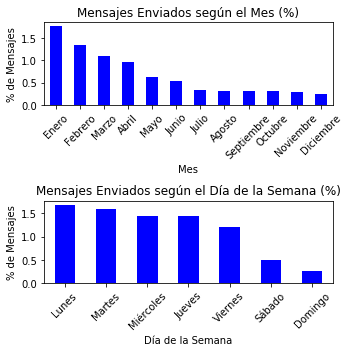

In [145]:
paired_mails['input_month'] = paired_mails['input_date'].dt.month
paired_mails['input_dayofweek'] = paired_mails['input_date'].dt.dayofweek

# Plot for month and day of week variables
day_value_counts = (paired_mails['input_dayofweek'].value_counts()/df.shape[0])*100
month_value_counts = (paired_mails['input_month'].value_counts()/df.shape[0])*100

monthnames_ES = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
daynames_ES = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,5))

month_value_counts.plot(ax=ax1, rot=45, kind='bar', title='Mensajes Enviados según el Mes (%)', color='b')
ax1.set_xticklabels(monthnames_ES)
ax1.set_ylabel('% de Mensajes')
ax1.set_xlabel('Mes')

day_value_counts.plot(ax=ax2, rot=45, kind='bar', title='Mensajes Enviados según el Día de la Semana (%)', color='b')
ax2.set_xticklabels(daynames_ES)
ax2.set_ylabel('% de Mensajes')
ax2.set_xlabel('Día de la Semana')

plt.tight_layout()
plt.show()
#fig.savefig('grafico_barras_dia_mes.svg', format='svg')
#fig.savefig('grafico_barras_dia_mes.png', format='png')

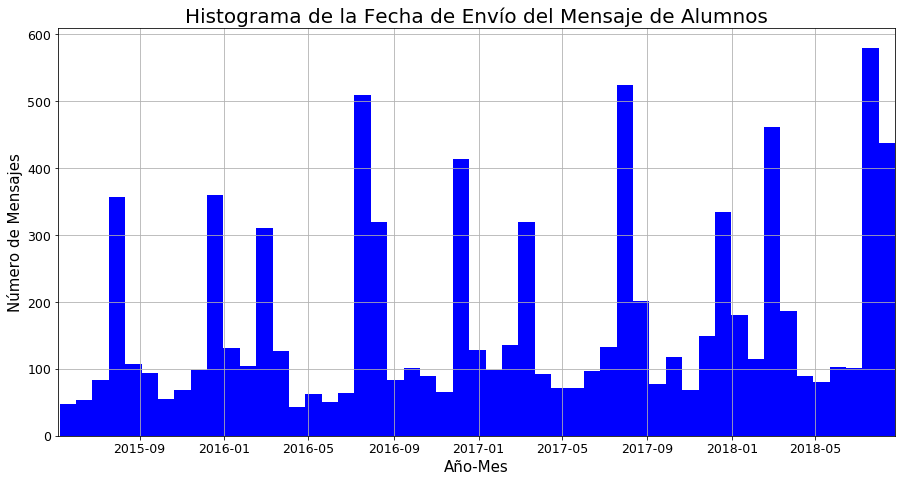

In [146]:
paired_mails['input_date'].hist(bins=51, figsize=(10*1.5,5*1.5), color='blue')

plt.xlim(df['date'].min(), df['date'].max())
plt.title('Histograma de la Fecha de Envío del Mensaje de Alumnos',fontsize=20)
plt.ylabel('Número de Mensajes',fontsize=15)
plt.xlabel('Año-Mes',fontsize=15)
plt.yticks(fontsize=12.5)
plt.xticks(fontsize=12.5)
plt.savefig('hist_fecha_inputs.svg', dpi=300, format='svg')
plt.show()

NameError: name 'historyDirs' is not defined

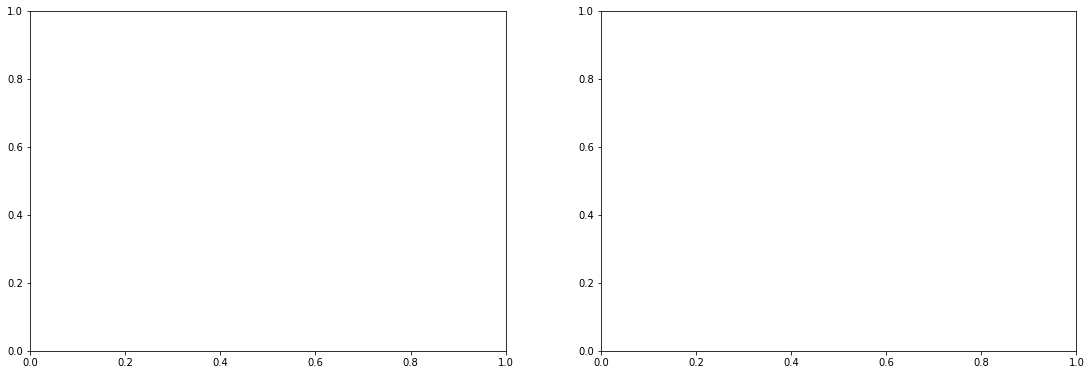

In [147]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15*1.25,5*1.25))

for historyDir in historyDirs:
    params = historyDir.replace('.pk','').split('_')[-4:]
    try:
        history = pickle.load(open(historyDir,'rb'))
        ax1.plot(range(len(history['loss'])), history['loss'], linewidth=5)
        ax1.grid(True)
        ax1.set_ylabel('Entropía Cruzada (Error)',fontsize=20)
        ax1.set_xlabel('Época',fontsize=20)
        ax1.set_title('Entrenamiento',fontsize=20)
        ax1.set_xlim(-0.5, 100)
        ax1.set
        ax2.plot(range(len(history['val_loss'])), history['val_loss'], linewidth=5)
        ax2.grid(True)
        ax2.set_xlabel('Época',fontsize=20)
        ax2.set_title('Validación',fontsize=20)
        plt.suptitle('Curvas de Error',fontsize=25)
        ax2.set_xlim(-0.5, 100)
    except:
        pass
fig.savefig('curvas_error.svg', dpi=300, format='svg')

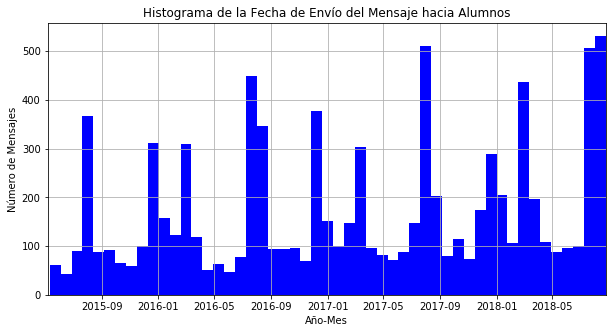

In [148]:
paired_mails['resp_date'].hist(bins=51, figsize=(10,5), color='blue')
plt.xlim(df['date'].min(), df['date'].max())
plt.title('Histograma de la Fecha de Envío del Mensaje hacia Alumnos')
plt.ylabel('Número de Mensajes')
plt.xlabel('Año-Mes')
plt.show()
#fig.savefig('hist_fecha_resps.svg', format='svg')

In [149]:
# Create features to detect possible errors
paired_mails['resp_time'] = paired_mails['resp_date'] - paired_mails['input_date']
paired_mails['input_body_len'] = paired_mails['input_body'].apply(len)
paired_mails['resp_body_len'] = paired_mails['resp_body'].apply(len)

In [150]:
# Calculate input messages lenghts
input_len_stats = paired_mails['input_body_len'].describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.98, 0.99]).round()
print()
print(input_len_stats)
print()


count       8749.0
mean        1551.0
std        62454.0
min            0.0
1%            75.0
5%           122.0
10%          153.0
25%          225.0
50%          353.0
75%          618.0
80%          742.0
85%          982.0
90%         1361.0
98%         3187.0
99%         4055.0
max      4638334.0
Name: input_body_len, dtype: float64



In [151]:
# Calculate response messages lenghts
resp_len_stats =  paired_mails['resp_body_len'].describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.98, 0.99]).round()
print()
print(resp_len_stats)
print()


count     8749.0
mean      1406.0
std       1029.0
min         12.0
5%         608.0
10%        701.0
25%        845.0
50%       1076.0
75%       1615.0
80%       1826.0
85%       2053.0
90%       2427.0
98%       4592.0
99%       5584.0
max      16156.0
Name: resp_body_len, dtype: float64



In [152]:
# Response time analysis
resp_time_stats = paired_mails['resp_time'].describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.98, 0.99])
print()
print(resp_time_stats)
print()


count                       8749
mean      3 days 11:04:02.944565
std      26 days 00:35:37.054634
min              0 days 00:00:25
5%               0 days 00:03:57
10%              0 days 00:07:04
25%              0 days 00:27:33
50%              0 days 05:49:28
75%              1 days 01:20:34
80%              1 days 20:49:16
85%       2 days 17:37:08.800000
90%       4 days 05:23:37.799999
98%      20 days 19:11:46.879999
99%      36 days 14:59:36.480000
max            982 days 18:54:12
Name: resp_time, dtype: object



In [153]:
# Filter errors using response time
paired_mails = paired_mails[paired_mails['resp_time'] <= paired_mails['resp_time'].sort_values().iloc[-65]]

In [154]:
# Filter errors using messages body lenghts
paired_mails = paired_mails[paired_mails['input_body_len'] <= paired_mails['input_body_len'].sort_values().iloc[-3]]
# not errors caught using resp_body_len

In [155]:
# Response time analysis
resp_time_stats = paired_mails['resp_time'].describe([0.05, 0.1, 0.25, 0.5, 0.75, 0.8, 0.85, 0.9, 0.98, 0.99])
print()
print(resp_time_stats)
print()


count                       8683
mean      1 days 16:19:46.557065
std       4 days 13:22:09.718730
min              0 days 00:00:25
5%               0 days 00:03:55
10%       0 days 00:06:59.200000
25%       0 days 00:26:52.500000
50%              0 days 05:31:06
75%              1 days 00:37:58
80%              1 days 19:33:16
85%       2 days 16:04:25.199999
90%       3 days 22:25:13.800000
98%      16 days 22:32:56.960000
99%      23 days 17:43:41.480000
max             65 days 22:04:33
Name: resp_time, dtype: object



In [163]:
paired_mails['input_body'] = paired_mails['input_body'].apply(filterMail)
paired_mails['resp_body'] = paired_mails['resp_body'].apply(filterMail)

In [164]:
paired_mails['resp_body'] = paired_mails['resp_body'].apply(filterFirm)

In [165]:
sentence_pairs = paired_mails[['input_body','resp_body']]

In [166]:
sentence_pairs.to_csv('output/data_cleaning_nlp/q_and_a.txt', sep='\t', index=False, header=False)

In [ ]:
paired_mails['input_body'] = paired_mails['input_body'].apply(lambda x: regex.sub(pattern='[`<@!*>-]', repl='', string=x))
paired_mails['resp_body'] = paired_mails['resp_body'].apply(lambda x: regex.sub(pattern='[`<@!*>-]', repl='', string=x))

In [ ]:
paired_mails.to_csv('output/data_cleaning_nlp/paired_emails.csv', encoding='utf-8', index=False)

## NLP

In [ ]:
## Tokenization using NLTK
# Define input (x) and target (y) sequences variables
x = [word_tokenize(msg, language='spanish') for msg in paired_mails['input_body'].values]
y = [word_tokenize(msg, language='spanish') for msg in paired_mails['resp_body'].values]

In [ ]:
# Variables to store lenghts 
hist_len_inp = []
hist_len_out = []

maxlen_inp = 0
maxlen_out = 0

# Define word counter
word_freqs_inp = collections.Counter()
word_freqs_out = collections.Counter()
num_recs = 0

for inp, out in zip(x, y):
    # Get input and target sequence lenght
    hist_len_inp.append(len(inp))
    hist_len_out.append(len(out))
    
    # Calculate max sequence lenght
    if len(inp) > maxlen_inp: maxlen_inp = len(inp)
    if len(out) > maxlen_out: maxlen_out = len(out)
        
    # Count unique words
    for words in inp:
        word_freqs_inp[words] += 1
    
    for words in out:
        word_freqs_out[words] += 1

    num_recs += 1

print()
print("maxlen input:", maxlen_inp)
print("maxlen output:", maxlen_out)
print("features (words) - input:", len(word_freqs_inp))
print("features (words) - output:", len(word_freqs_out))
print("number of records:", num_recs)
print()

In [ ]:
plt.hist(hist_len_inp, bins =100)
plt.xlim((0,850))
plt.xticks(range(0,800,100))
plt.title('input_len')
plt.show()

In [ ]:
plt.hist(hist_len_out, bins=100)
plt.xlim((0,850))
plt.xticks(range(0,800,100))
plt.title('output_len')
plt.show()

In [ ]:
pk.dump(word_freqs_inp, open('output/data_cleaning_nlp/word_freqs_input.pk', 'wb'))
pk.dump(word_freqs_out, open('output/data_cleaning_nlp/word_freqs_output.pk', 'wb'))
pk.dump(x, open('output/data_cleaning_nlp/input_data.pk', 'wb'))
pk.dump(y, open('output/data_cleaning_nlp/target_data.pk', 'wb'))